In [119]:
# Librerias que vamos a usar
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [148]:
# Crague datos Excel
archivo_excel = 'Datos/BaseInicial2.xlsx'
hoja_datos = 'Hoja1'

df = pd.read_excel(archivo_excel, sheet_name=hoja_datos)

In [149]:
df.head()
df.shape

(2211, 34)

In [214]:
#arcos_stage = df.loc[df["Principales inversionistas"].notna(),["Organization Name","Principales inversionistas"]]
arcos_stage = df[["Organization Name","Principales inversionistas"]]
lista_empresas_validas = df["Organization Name"].to_list()

diccionario_arcos = []

for index, row in arcos_stage.iterrows():
    inversionistas  = row["Principales inversionistas"]
    sources = str(inversionistas).split(', ')
    for source in sources:
        diccionario_arcos.append([source.strip(),row["Organization Name"].strip()])

arcos_totales = pd.DataFrame(diccionario_arcos, columns=['Source', 'Target'])

arcos = arcos_totales[arcos_totales['Source'].isin(lista_empresas_validas) & arcos_totales['Target'].isin(lista_empresas_validas)]
lista_arcos = list(zip(arcos['Source'], arcos['Target']))
lista_arcos_totales = list(zip(arcos_totales['Source'], arcos_totales['Target']))
print(arcos.shape)
arcos.head()
arcos["Source"].value_counts()




(4181, 2)


Source
Tiger Global Management     104
Andreessen Horowitz          83
Y Combinator                 72
Sequoia Capital              72
Accel                        67
                           ... 
Lennar Corporation            1
NextGen Venture Partners      1
The Walt Disney Company       1
WarnerMedia                   1
Peacock Equity                1
Name: count, Length: 1266, dtype: int64

In [215]:
len(lista_empresas_validas)

2211

In [216]:
nodos_csv = df.loc[df["Principales inversionistas"].notna(),["Organization Name","Last Funding Type"]]
nodos_csv = df.loc[:,["Organization Name","Last Funding Type"]]
nodos_csv = nodos_csv.rename(columns={"Organization Name": "Id", "Last Funding Type": "Last Funding Types"})
nodos_csv = nodos_csv[nodos_csv["Id"].isin(arcos["Source"].to_list()) | nodos_csv["Id"].isin(arcos["Target"].to_list())]
nodos_csv.to_csv('Datos/nodos.csv', index=False)
arcos.to_csv('Datos/arcos.csv', index=False)

In [217]:
# Crear una red dirigida
A=nx.DiGraph()
#A.add_nodes_from(nodos_csv["Id"])
A.add_edges_from(lista_arcos)
print(f'Nodos: {A.number_of_nodes()}')
print(f'Arcos: {A.number_of_edges()}')
densidad_dirigida=nx.number_of_edges(A)/(nx.number_of_nodes(A)*(nx.number_of_nodes(A)-1))
print(f'Densidad: {densidad_dirigida}')
print(f'Reciprocidad: {nx.reciprocity(A)}')



Nodos: 2106
Arcos: 4181
Densidad: 0.0009431259629201038
Reciprocidad: 0.0014350633819660368


In [226]:
# Crear una red dirigida

B=nx.DiGraph()
B.add_edges_from(lista_arcos_totales)
B.remove_node('nan')
print(f'Nodos: {B.number_of_nodes()}')
print(f'Arcos: {B.number_of_edges()}')
densidad_dirigida=nx.number_of_edges(B)/(nx.number_of_nodes(B)*(nx.number_of_nodes(B)-1))
print(f'Densidad: {densidad_dirigida}')
print(f'Reciprocidad: {nx.reciprocity(B)}')

Nodos: 2811
Arcos: 5076
Densidad: 0.0006426203109036563
Reciprocidad: 0.001182033096926714


In [220]:
empresa_buscar = 'nan'
for empresa in lista_arcos_totales:
    if not empresa_buscar in empresa:
        print(empresa)
        # Puedes hacer más cosas aquí si es necesario

arcos_sin_nan = []
empresa_buscar = 'nan'
for empresa in lista_arcos_totales:
    if not empresa_buscar in empresa:
        arcos_sin_nan.append(empresa)
        # Puedes hacer más cosas aquí si es necesario

('IDG Capital', 'Tencent')
('Prosus & Naspers', 'Tencent')
('Lippo Group', 'Tencent')
('PCCW', 'Tencent')
('Andreessen Horowitz', 'Twitter')
('Morgan Stanley', 'Twitter')
('Spark Capital', 'Twitter')
('Union Square Ventures', 'Twitter')
('Insight Partners', 'Twitter')
('Tencent', 'Ubisoft')
('JP Morgan Chase', 'Ubisoft')
("Ontario Teachers' Pension Plan", 'Ubisoft')
('Electronic Arts', 'Ubisoft')
('SoftBank', 'WeWork')
('JP Morgan Chase', 'WeWork')
('Goldman Sachs', 'WeWork')
('Insight Partners', 'WeWork')
('Cushman & Wakefield', 'WeWork')
('Smash Capital', 'Wagestream')
('Ascension', 'Wagestream')
('BlackRock', 'Wagestream')
('QED Investors', 'Wagestream')
('Northzone', 'Wagestream')
('Y Combinator', 'Xendit')
('Tiger Global Management', 'Xendit')
('Accel', 'Xendit')
('East Ventures', 'Xendit')
('Goat Capital', 'Xendit')
('RRE Ventures', 'Techstars')
('Foundry Group', 'Techstars')
('Mercury', 'Techstars')
('Silicon Valley Bank', 'Techstars')
('IA Ventures', 'Techstars')
('Meyer Global

In [225]:
B.has_node('nan')

True

In [197]:
lista_arcos_totales

[('IDG Capital', 'Tencent'),
 ('Prosus & Naspers', 'Tencent'),
 ('Lippo Group', 'Tencent'),
 ('PCCW', 'Tencent'),
 ('nan', 'Warburg Pincus'),
 ('Andreessen Horowitz', 'Twitter'),
 ('Morgan Stanley', 'Twitter'),
 ('Spark Capital', 'Twitter'),
 ('Union Square Ventures', 'Twitter'),
 ('Insight Partners', 'Twitter'),
 ('Tencent', 'Ubisoft'),
 ('JP Morgan Chase', 'Ubisoft'),
 ("Ontario Teachers' Pension Plan", 'Ubisoft'),
 ('Electronic Arts', 'Ubisoft'),
 ('SoftBank', 'WeWork'),
 ('JP Morgan Chase', 'WeWork'),
 ('Goldman Sachs', 'WeWork'),
 ('Insight Partners', 'WeWork'),
 ('Cushman & Wakefield', 'WeWork'),
 ('Smash Capital', 'Wagestream'),
 ('Ascension', 'Wagestream'),
 ('BlackRock', 'Wagestream'),
 ('QED Investors', 'Wagestream'),
 ('Northzone', 'Wagestream'),
 ('Y Combinator', 'Xendit'),
 ('Tiger Global Management', 'Xendit'),
 ('Accel', 'Xendit'),
 ('East Ventures', 'Xendit'),
 ('Goat Capital', 'Xendit'),
 ('RRE Ventures', 'Techstars'),
 ('Foundry Group', 'Techstars'),
 ('Mercury', 'Tec

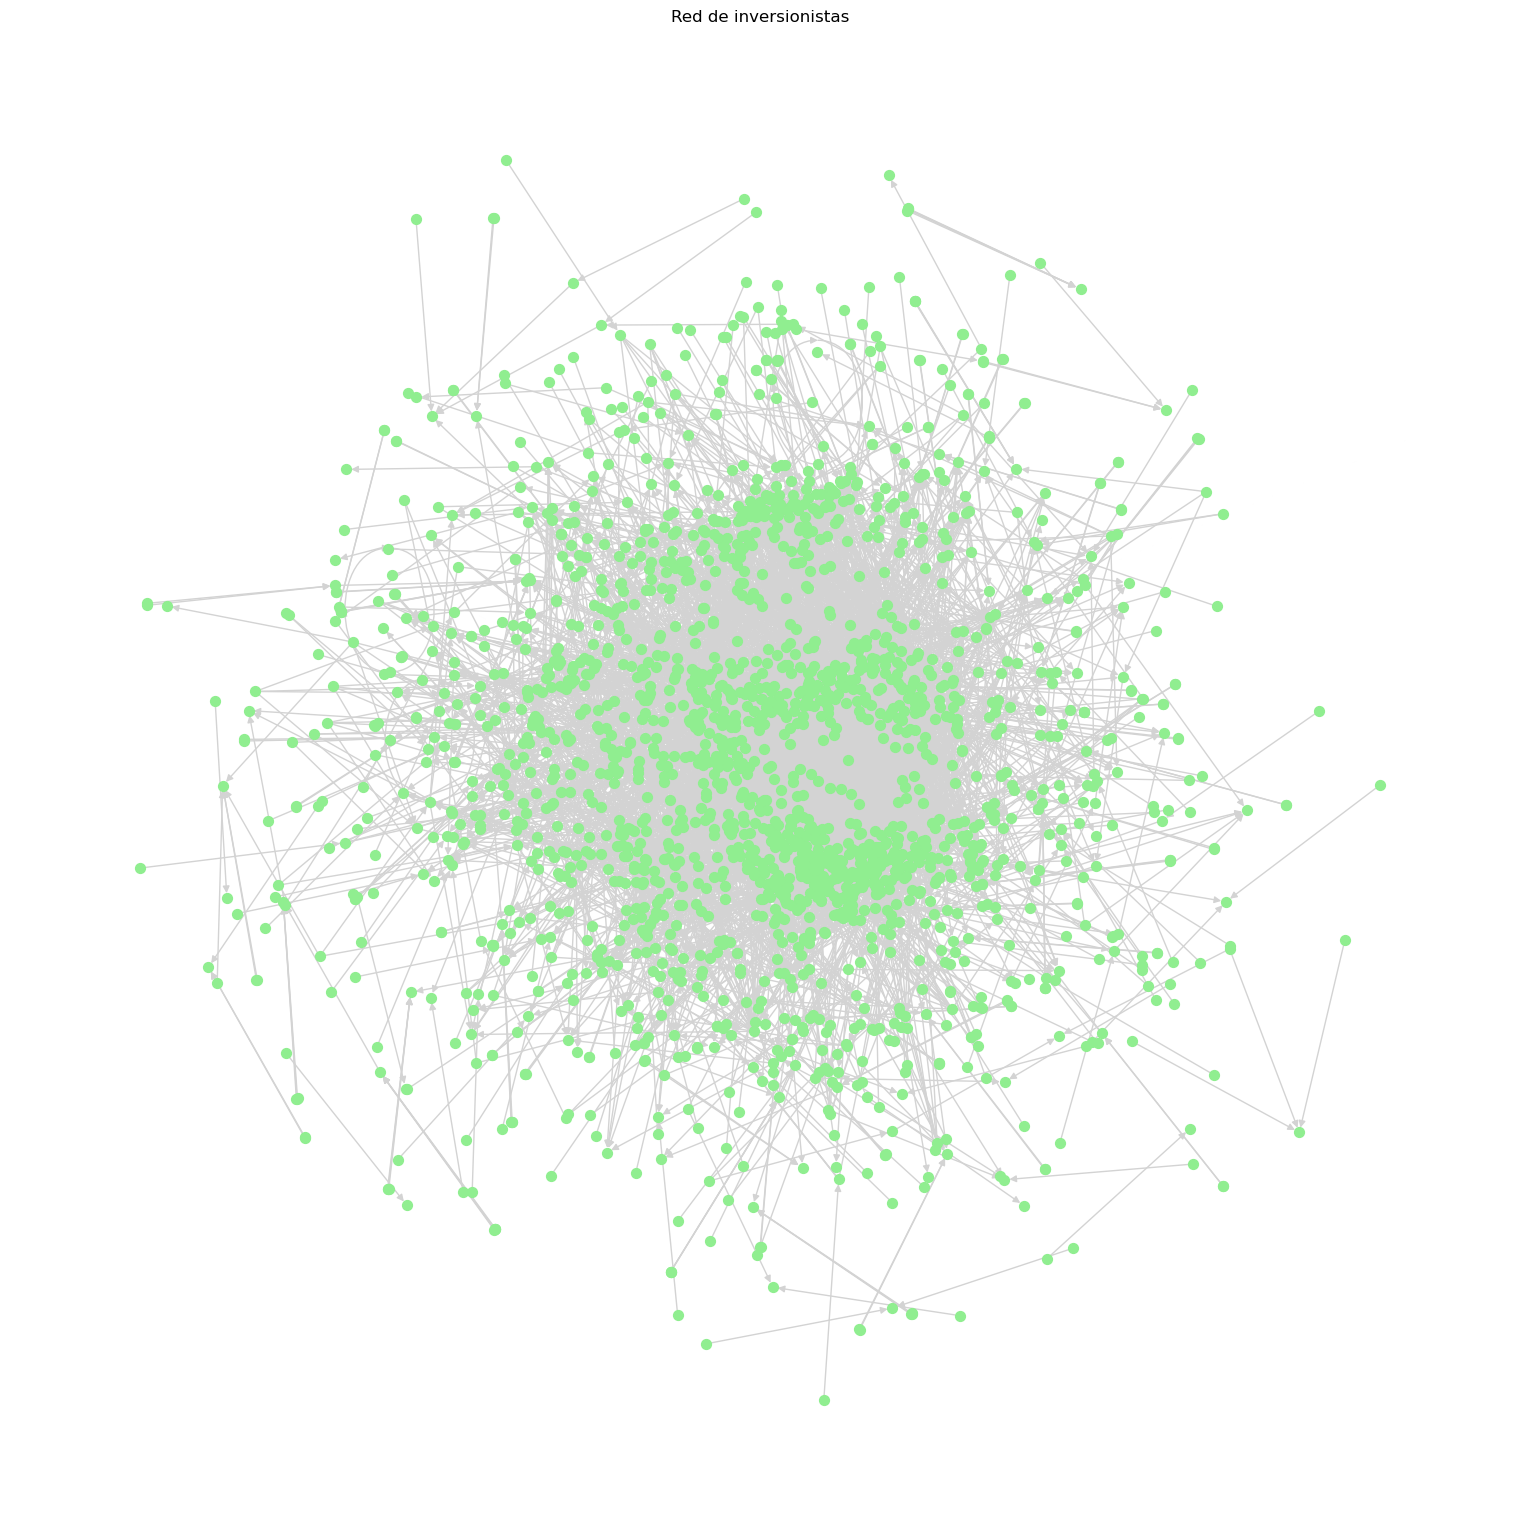

In [68]:
# Lienzo de la gráfica
fig=plt.figure(figsize=(15,15))

# Después se genera el gráfico
nx.draw_kamada_kawai(A, node_size=50, node_color='lightgreen', edge_color='lightgray')

plt.title('Red de inversionistas')
# Por último se muestra la gráfica
plt.show()

Nodos: 5
Arcos: 8
Reciprocidad: 0.75


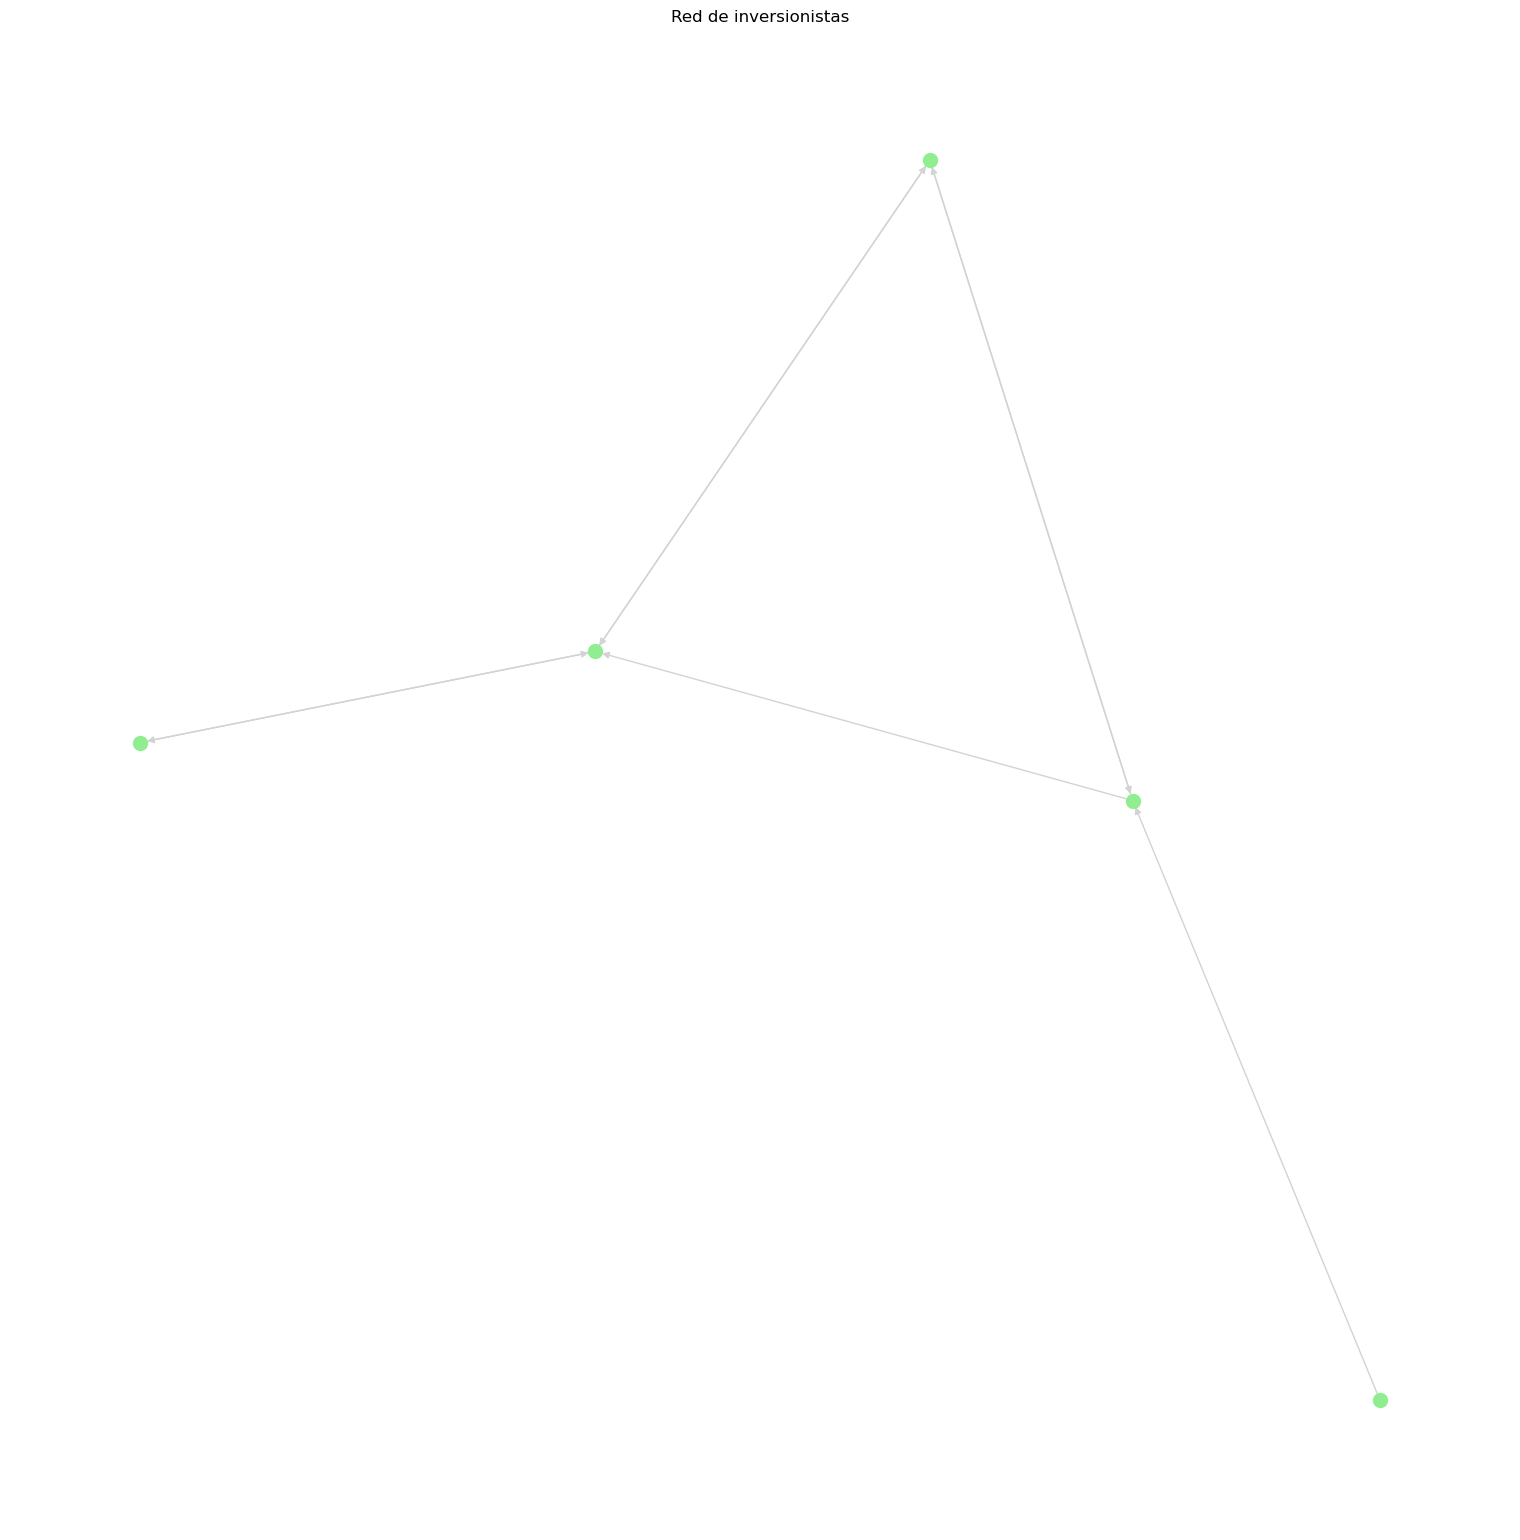

In [60]:
lista = []

lista.append(('A','B'))
lista.append(('B','A'))
lista.append(('B','C'))
lista.append(('C','B'))
lista.append(('C','D'))
lista.append(('D','C'))
lista.append(('F','A'))
lista.append(('A','C'))
lista 


# Crear una red dirigida
B=nx.DiGraph()
B.add_edges_from(lista)
print(f'Nodos: {B.number_of_nodes()}')
print(f'Arcos: {B.number_of_edges()}')
print(f'Reciprocidad: {nx.reciprocity(B)}')


# Lienzo de la gráfica
fig=plt.figure(figsize=(15,15))

# Después se genera el gráfico
nx.draw_kamada_kawai(B, node_size=100, node_color='lightgreen', edge_color='lightgray')

plt.title('Red de inversionistas')
# Por último se muestra la gráfica
plt.show()
